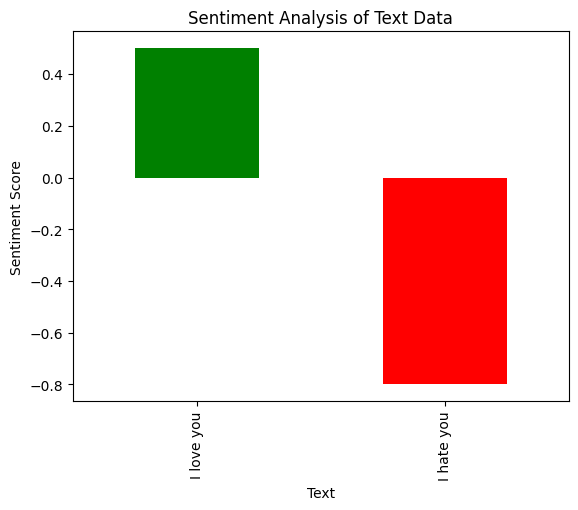

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

data = ["I love you", "I hate you"]

# Calculate sentiment scores for each text using TextBlob
sentiment_scores = [TextBlob(text).sentiment.polarity for text in data]

# Create a pandas DataFrame to store the sentiment scores and the original text
df = pd.DataFrame({'Text': data, 'Sentiment_Score': sentiment_scores})

# Plot a bar chart of the sentiment scores
ax = df.plot(kind='bar', x='Text', y='Sentiment_Score', color=['green', 'red'], legend=False)

# Set the title and axis labels
ax.set_title('Sentiment Analysis of Text Data')
ax.set_xlabel('Text')
ax.set_ylabel('Sentiment Score')

# Show the plot
plt.show()




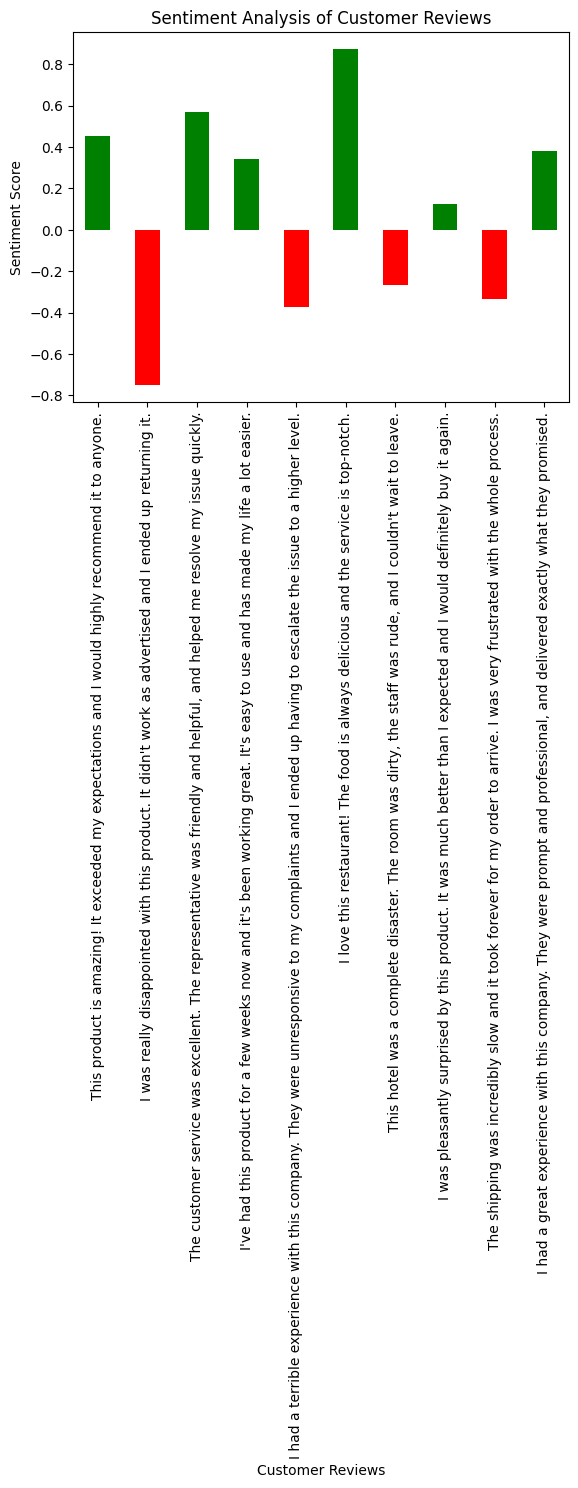

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

data = ["This product is amazing! It exceeded my expectations and I would highly recommend it to anyone.",
        "I was really disappointed with this product. It didn't work as advertised and I ended up returning it.",
        "The customer service was excellent. The representative was friendly and helpful, and helped me resolve my issue quickly.",
        "I've had this product for a few weeks now and it's been working great. It's easy to use and has made my life a lot easier.",
        "I had a terrible experience with this company. They were unresponsive to my complaints and I ended up having to escalate the issue to a higher level.",
        "I love this restaurant! The food is always delicious and the service is top-notch.",
        "This hotel was a complete disaster. The room was dirty, the staff was rude, and I couldn't wait to leave.",
        "I was pleasantly surprised by this product. It was much better than I expected and I would definitely buy it again.",
        "The shipping was incredibly slow and it took forever for my order to arrive. I was very frustrated with the whole process.",
        "I had a great experience with this company. They were prompt and professional, and delivered exactly what they promised."]

# Calculate sentiment scores for each text using TextBlob
sentiment_scores = [TextBlob(text).sentiment.polarity for text in data]

# Create a pandas DataFrame to store the sentiment scores and the original text
df = pd.DataFrame({'Text': data, 'Sentiment_Score': sentiment_scores})

# Plot a bar chart of the sentiment scores
ax = df.plot(kind='bar', x='Text', y='Sentiment_Score', color=['green' if score > 0 else 'red' for score in sentiment_scores], legend=False)

# Set the title and axis labels
ax.set_title('Sentiment Analysis of Customer Reviews')
ax.set_xlabel('Customer Reviews')
ax.set_ylabel('Sentiment Score')

# Show the plot
plt.show()

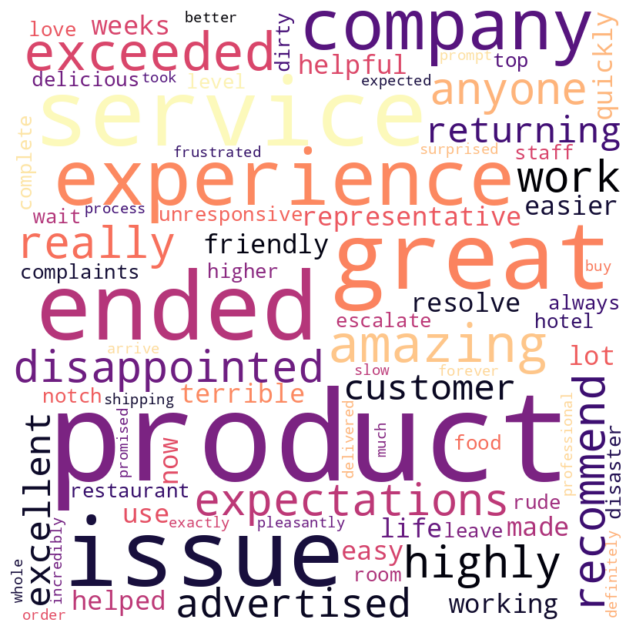

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = ["This product is amazing! It exceeded my expectations and I would highly recommend it to anyone.",
        "I was really disappointed with this product. It didn't work as advertised and I ended up returning it.",
        "The customer service was excellent. The representative was friendly and helpful, and helped me resolve my issue quickly.",
        "I've had this product for a few weeks now and it's been working great. It's easy to use and has made my life a lot easier.",
        "I had a terrible experience with this company. They were unresponsive to my complaints and I ended up having to escalate the issue to a higher level.",
        "I love this restaurant! The food is always delicious and the service is top-notch.",
        "This hotel was a complete disaster. The room was dirty, the staff was rude, and I couldn't wait to leave.",
        "I was pleasantly surprised by this product. It was much better than I expected and I would definitely buy it again.",
        "The shipping was incredibly slow and it took forever for my order to arrive. I was very frustrated with the whole process.",
        "I had a great experience with this company. They were prompt and professional, and delivered exactly what they promised."]

# Join all the review texts into a single string
text = ' '.join(data)

# Create a WordCloud object with the desired parameters
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, colormap='magma').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

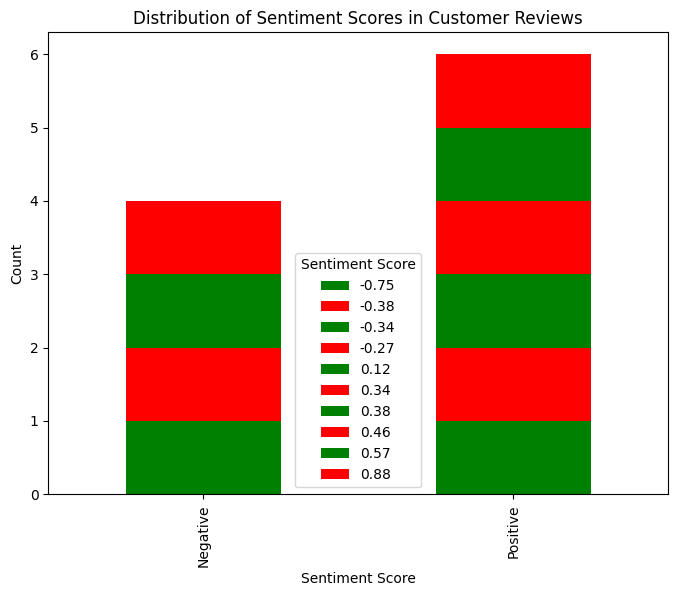

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

data = ["This product is amazing! It exceeded my expectations and I would highly recommend it to anyone.",
        "I was really disappointed with this product. It didn't work as advertised and I ended up returning it.",
        "The customer service was excellent. The representative was friendly and helpful, and helped me resolve my issue quickly.",
        "I've had this product for a few weeks now and it's been working great. It's easy to use and has made my life a lot easier.",
        "I had a terrible experience with this company. They were unresponsive to my complaints and I ended up having to escalate the issue to a higher level.",
        "I love this restaurant! The food is always delicious and the service is top-notch.",
        "This hotel was a complete disaster. The room was dirty, the staff was rude, and I couldn't wait to leave.",
        "I was pleasantly surprised by this product. It was much better than I expected and I would definitely buy it again.",
        "The shipping was incredibly slow and it took forever for my order to arrive. I was very frustrated with the whole process.",
        "I had a great experience with this company. They were prompt and professional, and delivered exactly what they promised."]

# Calculate sentiment scores for each text using TextBlob
sentiment_scores = [round(TextBlob(text).sentiment.polarity,2) for text in data]
# Assign a label (positive or negative) to each sentiment score
labels = ['Positive' if score > 0 else 'Negative' for score in sentiment_scores]

# Create a pandas DataFrame to store the sentiment scores and labels
df = pd.DataFrame({'Sentiment Score': sentiment_scores, 'Label': labels})

# Group the DataFrame by label and count the number of occurrences of each sentiment score
grouped = df.groupby(['Label', 'Sentiment Score']).size().reset_index(name='Count')

# Pivot the DataFrame to create a stacked bar chart
pivoted = grouped.pivot(index='Label', columns='Sentiment Score', values='Count').fillna(0)

# Plot the stacked bar chart
ax = pivoted.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8,6))

# Set the title and axis labels
ax.set_title('Distribution of Sentiment Scores in Customer Reviews')
ax.set_xlabel('Sentiment Score')
ax.set_ylabel('Count')

# Show the plot
plt.show()

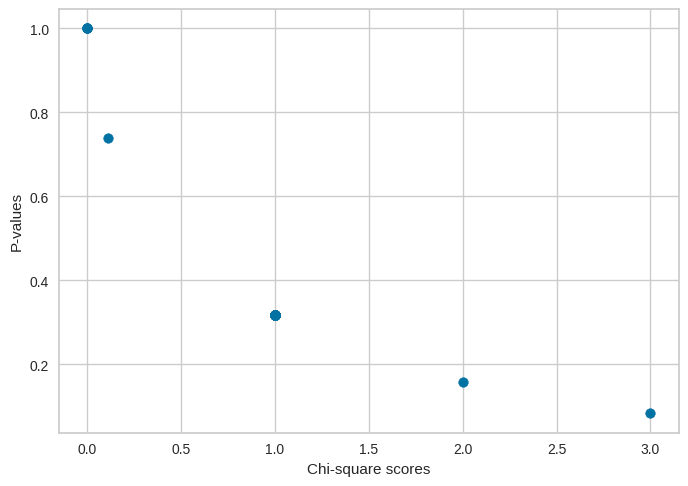

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from yellowbrick.text import FreqDistVisualizer

# Assume that you have your sentiment analysis reviews stored in a list called `reviews`
# Here's an example of how you can generate some sample reviews:
reviews = ['This movie is terrible. The acting is awful and the plot is nonsensical.',
           'I loved this book! The characters were well-developed and the story was engaging.',
           'The service at this restaurant was terrible. The food was cold and the waitstaff was rude.',
           'I had a great experience with this company. The customer service was excellent and the product was high-quality.'] # repeat the reviews 1000 times to get 4000 reviews

# Convert the reviews to a matrix of token counts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(reviews)

# Compute the chi-square statistic for each term in the matrix
chi_scores, p_vals = chi2(X, np.array([0, 1]*int(len(reviews)/2)))
# features= vectorizer.get_feature_names_out()
# Visualize the chi-square scores using a frequency distribution plot
fig, ax = plt.subplots()
ax.scatter(chi_scores, p_vals)

# for i, feature in enumerate(features):
#     ax.annotate(feature, (chi_scores[i], p_vals[i]))

plt.xlabel('Chi-square scores')
plt.ylabel('P-values')
plt.show()

In [ ]:
chi_scores

array([1000.        ,    0.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 3000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        ,    0.        , 1000.        ,
       2000.        ,  111.11111111,    0.        , 1000.        ,
          0.        , 1000.        , 1000.        , 1000.        ])